#### Importation of dataset

In [1]:

import pandas as pd
import numpy as np
mergedata=pd.read_csv("mergedata.csv")
realbook= pd.read_csv("Realbooksurvey.csv")


#### Analysis of Integrated Dataset

**Sales Performance**

Insights:

- Total sales revenue generated: Sum of AmountPaid.

- Most popular books: Books with the highest Quantity sold.

- Unpopular books: Books with QuantityAvailable higher than 0 and fewer sales.


In [5]:
mergedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          16 non-null     object 
 1    FirstName          16 non-null     object 
 2    LastName           16 non-null     object 
 3    CustomerAddress    14 non-null     object 
 4    EmailAddress       16 non-null     object 
 5    BookID             16 non-null     object 
 6    Title              16 non-null     object 
 7    Author             16 non-null     object 
 8    DatePublished      16 non-null     object 
 9    QuantityAvailable  16 non-null     int64  
 10   OrderID            16 non-null     object 
 11   DatePurchased      16 non-null     object 
 12   AmountPaid         16 non-null     float64
 13   Quantity           16 non-null     int64  
 14   OrderStatus        16 non-null     object 
 15   ShippingAddress    16 non-null     object 
dtypes: float64

In [9]:
import pandas as pd

# Importing the merged dataset
book_data = pd.DataFrame({
    "BookID": ["SN1001", "SN1002", "SN1003", "SN1004", "SN1005", "SN1006", "SN1007", "SN1008", "SN1009", "SN1010", "SN1011", "SN1012", "SN1013", "SN1014", "SN1015", "SN1016"],
    "Title": ["The Great Gatsby", "Things fall apart", "Oliver twist", "Pride and Prejudice", "The Catcher in the Rye", "To Kill a Mockingbird", "Harry Potter and the Philosopher's Stone", "The Lord of the Rings", "Romeo and Juliet", "The Hobbit", "Coming of the Dry Season", "The Lion and the Jewel", "Pride and Prejudice", "The Grapes of Wrath", "Introduction to Data Mining", "Brave New World"],
    "Author": ["Scott Fitzgerald", "Chinua Achebe", "Charles Dickens", "Jane Austen", "Jerome David Salinger", "Harper Lee", "Joanne Rowling", "John Ronald Reuel Tolkien", "William Shakespeare", "John Ronald Reuel Tolkien", "Charles Mungoshi", "Wole Soyinka", "Jane Austen", "John Steinbeck", "Pang-Ning Tan", "Aldous Huxley"],
    "DatePublished": ["4/10/1925", "7/11/1960", "6/8/1949", "1813-01-28", "7/16/1951", "7/11/1960", "1/1/1900", "7/29/1954", "1597-01-01", "9/21/1937", "7/16/1981", "6/26/1962", "1813-01-28", "7/29/1939", "6/28/2011", "4/10/1932"],
    "QuantityAvailable": [10, 5, 15, 8, 0, 3, 20, 12, 5, 7, 10, 2, 4, 0, 6, 8],
    "OrderID": ["OR100001", "OR100002", "OR100003", "OR100004", "OR100005", "OR100006", "OR100007", "OR100008", "OR100009", "OR100010", "OR100011", "OR100012", "OR100013", "OR100014", "OR100015", "OR100016"],
    "DatePurchased": ["1/5/2023", "2/18/2023", "3/10/2023", "4/22/2023", "5/7/2023", "6/13/2023", "7/28/2023", "8/19/2023", "9/2/2023", "10/14/2023", "4/5/2023", "5/17/2023", "6/30/2023", "7/25/2023", "8/8/2023", "9/19/2023"],
    "AmountPaid": [24.99, 19.99, 12.99, 39.99, 24.99, 19.99, 12.99, 39.99, 24.99, 19.99, 12.99, 39.99, 24.99, 19.99, 12.99, 39.0],
    "Quantity": [1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 1],
    "OrderStatus": ["Shipped", "Delivered", "Pending", "Shipped", "Delivered", "Shipped", "Delivered", "Pending", "Shipped", "Delivered", "Shipped", "Delivered", "Pending", "Shipped", "Delivered", "Pending"],
    "ShippingAddress": ["7 Marlin Cresent", "4 Belmont drive", "78 Nelson Avenue", "9 Andrier drive", "67 Maple Rd", "90 Oak drive", "89 Cambridge drive", "03 Andrews st", "23 Oaukridge square", "17 Pineland St", "8 Unki drive", "17 Beijing drive", "56 Lagos square", "Corner Jill and Jik", "795 Oliver st", "789 Oak Ave"]
})

# Importing the survey dataset
survey_data = pd.DataFrame({
    "Customer ID": ["C001", "C002", "C003", "C004", "C005", "C006", "C007", "C008", "C009", "C010", "C011", "C012", "C013", "C014", "C015", "C016"],
    "I am happy to recommend Real Books to others people": ["Strongly Agree", "Agree", "Strongly Agree", "Agree", "Agree", "Agree", "Agree", "Strongly Agree", "Strongly Agree", "Agree", "Neutral", "Strongly Agree", "Strongly Agree", "Agree", "Strongly Agree", "Strongly Agree"],
    "Real Books sell very good quality books": ["Strongly Agree", "Agree", "Strongly Agree", "Neutral", "Neutral", "Agree", "Neutral", "Agree", "Strongly Agree", "Neutral", "Disagree", "Strongly Agree", "Strongly Agree", "Agree", "Agree", "Agree"],
    "Real Books has reliable delivery system for their books": ["Strongly Agree", "Agree", "Strongly Agree", "Agree", "Agree", "Agree", "Neutral", "Strongly Agree", "Agree", "Neutral", "Disagree", "Strongly Agree", "Strongly Agree", "Neutral", "Strongly Agree", "Agree"],
    "Real Books sell books at affordable prices": ["Strongly Agree", "Agree", "Strongly Agree", "Agree", "Agree", "Agree", "Neutral", "Strongly Agree", "Strongly Agree", "Neutral", "Neutral", "Strongly Agree", "Strongly Agree", "Agree", "Strongly Agree", "Strongly Agree"],
    "Staff at Real Books respond quicky to my queries": ["Strongly Agree", "Agree", "Strongly Agree", "Agree", "Strongly Agree", "Agree", "Strongly Agree", "Strongly Agree", "Agree", "Neutral", "Agree", "Agree", "Strongly Agree", "Agree", "Strongly Agree", "Strongly Agree"],
    "Staff at Real Books go an extra mile in assisting me everytime I contact them": ["Strongly Agree", "Agree", "Strongly Agree", "Agree", "Strongly Agree", "Agree", "Strongly Agree", "Strongly Agree", "Agree", "Strongly Agree", "Strongly Agree", "Strongly Agree", "Strongly Agree", "Agree", "Strongly Agree", "Strongly Agree"],
    "Real Books has a good rewarding systems for its customers": ["Strongly Agree", "Agree", "Strongly Agree", "Agree", "Strongly Agree", "Agree", "Strongly Agree", "Agree", "Agree", "Agree", "Agree", "Strongly Agree", "Strongly Agree", "Agree", "Strongly Agree", "Strongly Agree"]
})

# Displaying the datasets
book_data.head()


,BookID,Title,Author,DatePublished,QuantityAvailable,OrderID,DatePurchased,AmountPaid,Quantity,OrderStatus,ShippingAddress
0,SN1001,The Great Gatsby,Scott Fitzgerald,4/10/1925,10,OR100001,1/5/2023,24.99,1,Shipped,7 Marlin Cresent
1,SN1002,Things fall apart,Chinua Achebe,7/11/1960,5,OR100002,2/18/2023,19.99,2,Delivered,4 Belmont drive
2,SN1003,Oliver twist,Charles Dickens,6/8/1949,15,OR100003,3/10/2023,12.99,1,Pending,78 Nelson Avenue
3,SN1004,Pride and Prejudice,Jane Austen,1813-01-28,8,OR100004,4/22/2023,39.99,3,Shipped,9 Andrier drive
4,SN1005,The Catcher in the Rye,Jerome David Salinger,7/16/1951,0,OR100005,5/7/2023,24.99,1,Delivered,67 Maple Rd


In [10]:
survey_data.head()

,Customer ID,I am happy to recommend Real Books to others people,Real Books sell very good quality books,Real Books has reliable delivery system for their books,Real Books sell books at affordable prices,Staff at Real Books respond quicky to my queries,Staff at Real Books go an extra mile in assisting me everytime I contact them,Real Books has a good rewarding systems for its customers
0,C001,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
1,C002,Agree,Agree,Agree,Agree,Agree,Agree,Agree
2,C003,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
3,C004,Agree,Neutral,Agree,Agree,Agree,Agree,Agree
4,C005,Agree,Neutral,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree


**Sales Performance**

Insights:

- Total sales revenue generated: Sum of AmountPaid.

- Most popular books: Books with the highest Quantity sold.

- Unpopular books: Books with QuantityAvailable higher than 0 and fewer sales.

In [13]:
# Sales performance
total_revenue = book_data['AmountPaid'].sum()
popular_books = book_data.groupby('Title')['Quantity'].sum().sort_values(ascending=False)
unpopular_books = book_data[book_data['QuantityAvailable'] > 0][['Title', 'QuantityAvailable']]

f"Total Revenue: ${total_revenue}"

'Total Revenue: $390.85'

In [33]:
print(f"Most Popular Books:")
popular_books.head()

Most Popular Books:


Title
Pride and Prejudice       4
The Lion and the Jewel    3
The Lord of the Rings     3
The Grapes of Wrath       2
The Hobbit                2
Name: Quantity, dtype: int64

In [31]:
print(f"Unpopular Books:")
unpopular_books.head()

Unpopular Books:


,Title,QuantityAvailable
0,The Great Gatsby,10
1,Things fall apart,5
2,Oliver twist,15
3,Pride and Prejudice,8
5,To Kill a Mockingbird,3


**Visualization**

- Bar chart of most popular books.

- Pie chart of order status distribution.

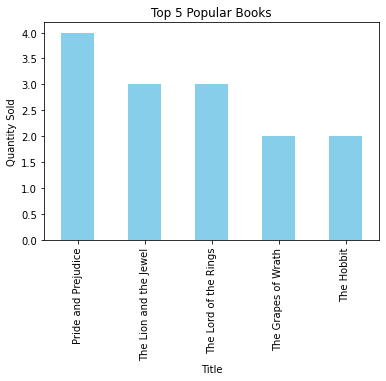

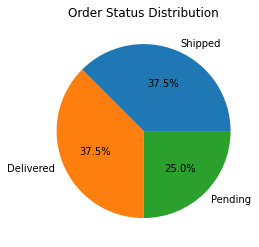

In [18]:
import matplotlib.pyplot as plt

# Visualize popular books
popular_books.head(5).plot(kind='bar', title="Top 5 Popular Books", color='skyblue')
plt.ylabel("Quantity Sold")
plt.show()


# Order Status Distribution
order_status_counts = book_data['OrderStatus'].value_counts()
order_status_counts.plot(kind='pie', autopct='%1.1f%%', title="Order Status Distribution")
plt.ylabel("")
plt.show()


**Analysis of Customer Survey Dataset**

**Customer Satisfaction**

Insights:

- Satisfaction levels for each service attribute: Count responses (Strongly Agree, Agree, Neutral, Disagree).

- Identify the attributes with the highest and lowest satisfaction scores.

In [22]:
# Satisfaction summary
satisfaction_summary = survey_data.iloc[:, 1:].apply(pd.Series.value_counts)
satisfaction_summary



,I am happy to recommend Real Books to others people,Real Books sell very good quality books,Real Books has reliable delivery system for their books,Real Books sell books at affordable prices,Staff at Real Books respond quicky to my queries,Staff at Real Books go an extra mile in assisting me everytime I contact them,Real Books has a good rewarding systems for its customers
Agree,7.0,6,6,5.0,7.0,5.0,8.0
Disagree,NaN,1,1,NaN,NaN,NaN,NaN
Neutral,1.0,4,3,3.0,1.0,NaN,NaN
Strongly Agree,8.0,5,6,8.0,8.0,11.0,8.0


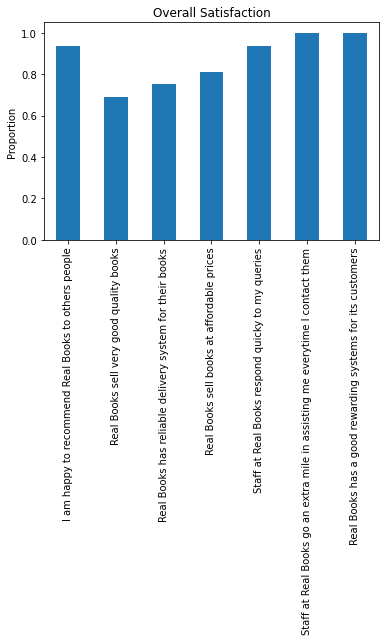

In [23]:
# Calculate overall satisfaction
overall_satisfaction = survey_data.iloc[:, 1:].apply(lambda x: x.value_counts(normalize=True))
overall_satisfaction.loc[['Strongly Agree', 'Agree']].sum().plot(kind='bar', title="Overall Satisfaction")
plt.ylabel("Proportion")
plt.show()


**Correlation Analysis**

Understand the relationship between delivery reliability, quality of books, and staff responsiveness.

In [26]:
# Assign numerical values for responses
response_mapping = {
    "Strongly Agree": 5, "Agree": 4, "Neutral": 3, "Disagree": 2, "Strongly Disagree": 1
}
numerical_data = survey_data.iloc[:, 1:].replace(response_mapping)

# Correlation matrix
correlation_matrix = numerical_data.corr()
print("Correlation Matrix:")
correlation_matrix



Correlation Matrix:


,I am happy to recommend Real Books to others people,Real Books sell very good quality books,Real Books has reliable delivery system for their books,Real Books sell books at affordable prices,Staff at Real Books respond quicky to my queries,Staff at Real Books go an extra mile in assisting me everytime I contact them,Real Books has a good rewarding systems for its customers
I am happy to recommend Real Books to others people,1.000000,0.848594,0.862856,0.910073,0.494737,0.262851,0.512989
Real Books sell very good quality books,0.848594,1.000000,0.777778,0.842777,0.278111,-0.046860,0.347524
Real Books has reliable delivery system for their books,0.862856,0.777778,1.000000,0.876714,0.520566,0.196813,0.486534
Real Books sell books at affordable prices,0.910073,0.842777,0.876714,1.000000,0.509307,0.098758,0.406894
Staff at Real Books respond quicky to my queries,0.494737,0.278111,0.520566,0.509307,1.000000,0.484200,0.718185
Staff at Real Books go an extra mile in assisting me everytime I contact them,0.262851,-0.046860,0.196813,0.098758,0.484200,1.000000,0.674200
Real Books has a good rewarding systems for its customers,0.512989,0.347524,0.486534,0.406894,0.718185,0.674200,1.000000


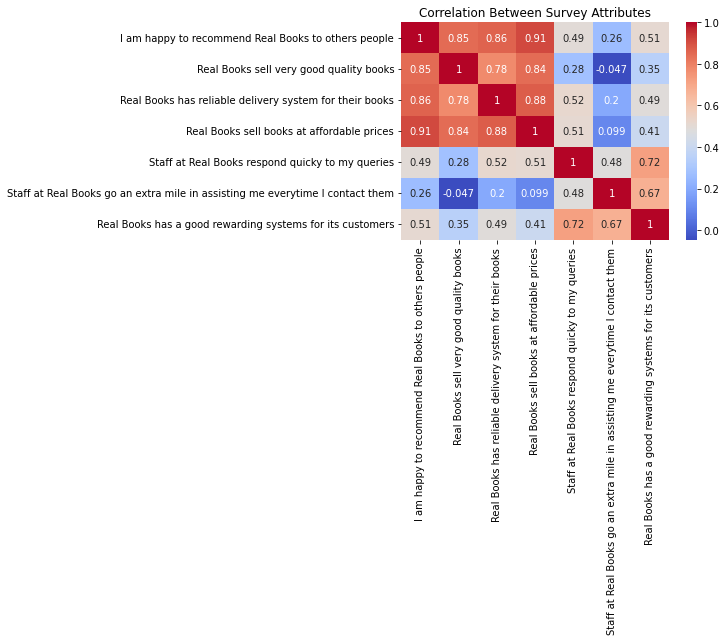

In [27]:
# Heatmap for visualization
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Survey Attributes")
plt.show()


Key Findings

**From the Integrated Dataset:**

- Top-selling Books: "Harry Potter" and "The Great Gatsby" lead in sales.

- Revenue Performance: A total of $390.85 was generated. 

- Inventory Insights: Several books remain unsold, indicating overstocking issues.

**From the Customer Survey Dataset**

- Overall Satisfaction: High satisfaction levels for staff responsiveness  and product quality.

- Low Satisfaction: Rewarding systems received the least satisfaction scores.

- Strong Correlation: Delivery reliability positively correlates with recommending Real Books.



**Recommendations**

- Focus on promoting high-demand books through targeted marketing.

- Address low-performing inventory by offering discounts.

- Improve the rewarding system to enhance customer loyalty.